# Baseball Databank (1871-2015) **Data Cleaning**

### Radhika Kulkarni


Description:

For our project, we plan to dive into the statistics of the sports world. We have found a dataset called "Baseball Databank" off Kaggle, which contains a file titled "Teams.csv".

https://www.kaggle.com/datasets/open-source-sports/baseball-databank?select=Teams.csv

The file contains historical data for every Major League Baseball team from 1871-2015. The data includes counting statistics, such as home runs, strikeouts, and wins, and qualitative data, such as whether or not the team won the World Series that season.

We plan to run an EDA first to determine which statistical model/ML algorithm we will use. Some potential research topics include determining if certain statistics have a strong correlation with World Series winners or running a regression model on the data and using a team's projected statistics to predict their win total.


In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
import math
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<ipython-input-1-33987b72b535>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [ ]:
#load in dataset
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset from path
path = "/content/drive/Shareddrives/baseball_folder/baseball/Teams.csv"

teams = pd.read_csv(path)

In [ ]:
#output first five entries for teams
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


### Data cleaning

Teams.csv drop unnecessary columns, data description, missing values, possible feature engineering, dimensionality reduction

In [ ]:
#rename the columns for better readability
teams = teams.set_axis(['year', 'league', 'team', 'franchise', 'division',
                        'rank', 'games_played', 'home_games_played',
                        'wins', 'losses', 'division_winner', 'wildcard_winner',
                        'league_champion', 'world_series_winner', 'runs_scored',
                        'at_bats', 'hits', 'doubles', 'triples',
                        'homeruns', 'walks', 'batter_strikeouts', 'stolen_bases',
                        'caught_stealing', 'hit_by_pitch', 'sacrifice_flies',
                        'opponents_runs_scored', 'earned_runs_allowed',
                        'earned_run_average', 'complete_games',
                        'shutouts', 'saves', 'outs_pitched', 'hits_allowed',
                        'homeruns_allowed', 'walks_allowed', 'pitcher_strikeouts',
                        'errors', 'double_plays', 'fielding_percentage',
                        'name', 'park', 'attendance', 'BPF', 'PPF', 'x', 'x',
                        'x'], axis=1, inplace=False)

<ipython-input-5-c7f6f9d2b425>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


In [ ]:
#output first five entries for teams
teams.head()

,year,league,team,franchise,division,rank,games_played,home_games_played,wins,losses,...,double_plays,fielding_percentage,name,park,attendance,BPF,PPF,x,x,x
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [ ]:
#plot correlation matrix. Color encoding: dark red indicates strong negative correlation between two variables, dark blue - strong positive correlation between two variables
corr = teams.corr()
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

<ipython-input-7-67c35384e30b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
<ipython-input-7-67c35384e30b>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,year,rank,games_played,home_games_played,wins,losses,runs_scored,at_bats,hits,doubles,triples,homeruns,walks,batter_strikeouts,stolen_bases,caught_stealing,hit_by_pitch,sacrifice_flies,opponents_runs_scored,earned_runs_allowed,earned_run_average,complete_games,shutouts,saves,outs_pitched,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,attendance,BPF,PPF
year,1.000,-0.294,0.601,0.342,0.419,0.425,0.273,0.605,0.506,0.683,-0.611,0.838,0.573,0.892,-0.393,-0.231,-0.205,-0.262,0.275,0.643,0.372,-0.876,0.095,0.898,0.617,0.508,0.884,0.572,0.879,-0.833,0.518,0.778,0.811,0.003,-0.007
rank,-0.294,1.000,-0.171,-0.085,-0.733,0.503,-0.448,-0.199,-0.306,-0.364,0.065,-0.359,-0.284,-0.226,-0.044,0.025,-0.122,-0.253,0.305,0.100,0.319,0.197,-0.380,-0.404,-0.203,0.047,-0.174,0.014,-0.347,0.309,-0.030,-0.299,-0.466,-0.162,0.117
games_played,0.601,-0.171,1.000,0.964,0.676,0.661,0.533,0.987,0.868,0.679,0.002,0.523,0.774,0.651,-0.098,0.173,-0.021,0.087,0.514,0.703,0.175,-0.246,0.351,0.525,0.997,0.858,0.550,0.776,0.641,-0.495,0.613,0.860,0.406,0.040,-0.006
home_games_played,0.342,-0.085,0.964,1.000,0.359,0.295,0.354,0.904,0.547,0.379,-0.169,0.381,0.382,0.486,0.018,0.041,-0.010,0.061,0.314,0.374,0.086,-0.284,0.122,0.408,0.951,0.519,0.409,0.371,0.490,-0.209,0.406,0.319,0.346,0.002,-0.009
wins,0.419,-0.733,0.676,0.359,1.000,-0.102,0.677,0.689,0.725,0.587,0.087,0.484,0.656,0.420,0.043,0.079,0.161,0.299,0.006,0.236,-0.220,-0.134,0.546,0.506,0.697,0.413,0.320,0.381,0.519,-0.430,0.303,0.644,0.398,0.159,-0.099
losses,0.425,0.503,0.661,0.295,-0.102,1.000,0.029,0.632,0.436,0.340,-0.123,0.249,0.386,0.496,-0.186,0.092,-0.163,-0.297,0.687,0.726,0.481,-0.244,-0.090,0.232,0.637,0.741,0.454,0.667,0.365,-0.268,0.354,0.522,-0.069,-0.108,0.092
runs_scored,0.273,-0.448,0.533,0.354,0.677,0.029,1.000,0.619,0.802,0.693,0.252,0.500,0.647,0.251,0.181,-0.026,0.232,0.509,0.548,0.554,0.318,-0.054,-0.006,0.302,0.519,0.595,0.388,0.468,0.308,-0.131,0.474,0.412,0.299,0.234,0.050
at_bats,0.605,-0.199,0.987,0.904,0.689,0.632,0.619,1.000,0.920,0.737,0.015,0.559,0.774,0.631,-0.121,0.122,0.040,0.297,0.565,0.743,0.227,-0.258,0.296,0.532,0.984,0.884,0.579,0.777,0.634,-0.480,0.668,0.845,0.435,0.066,0.006
hits,0.506,-0.306,0.868,0.547,0.725,0.436,0.802,0.920,1.000,0.818,0.153,0.533,0.738,0.448,-0.082,0.137,0.081,0.496,0.592,0.738,0.309,-0.202,0.188,0.455,0.863,0.867,0.516,0.698,0.490,-0.434,0.612,0.759,0.313,0.146,0.037
doubles,0.683,-0.364,0.679,0.379,0.587,0.340,0.693,0.737,0.818,1.000,-0.135,0.666,0.647,0.591,-0.239,-0.068,0.141,0.362,0.520,0.735,0.434,-0.498,0.051,0.609,0.681,0.722,0.663,0.595,0.615,-0.570,0.512,0.711,0.540,0.148,0.068


In [ ]:
#BPF and PPF do not have any major correlations between any of the other variables. Recommendation is to drop these columns.
teams = teams.drop(columns=['BPF', 'PPF', 'x', 'x', 'x'])

In [ ]:
#read columns and null/non-null rows and columns, data types
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   2805 non-null   int64  
 1   league                 2755 non-null   object 
 2   team                   2805 non-null   object 
 3   franchise              2805 non-null   object 
 4   division               1288 non-null   object 
 5   rank                   2805 non-null   int64  
 6   games_played           2805 non-null   int64  
 7   home_games_played      2406 non-null   float64
 8   wins                   2805 non-null   int64  
 9   losses                 2805 non-null   int64  
 10  division_winner        1260 non-null   object 
 11  wildcard_winner        624 non-null    object 
 12  league_champion        2777 non-null   object 
 13  world_series_winner    2448 non-null   object 
 14  runs_scored            2805 non-null   int64  
 15  at_b

## Subsetting Year for Baseball Databank

Because we want to predict World Series winners, we need to have all data on a level playing field, so to speak.

In 1961 there was a revamp of baseball rules to standardize the playing regulations for all teams, which is in effect until current day.
Therefore, we separate our data into two subsets:

1. 1871-2015
2. 1961-2015.

We will see if the older historical data (1871-1961) will give us more accurate prediction of World Series winners than the recent data of 1961-2015 by itself.

We name our new dataset `teams_recent.csv`.

In [ ]:
teams_recent = teams[teams.year >=1961]
teams_recent.head()

,year,league,team,franchise,division,rank,games_played,home_games_played,wins,losses,...,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,name,park,attendance
1359,1961,AL,BAL,BAL,NaN,3,163,82.0,95,67,...,1226,109,617,926,126,173.0,0.98,Baltimore Orioles,Memorial Stadium,951089.0
1360,1961,AL,BOS,BOS,NaN,6,163,82.0,76,86,...,1472,167,679,831,143,140.0,0.97,Boston Red Sox,Fenway Park II,850589.0
1361,1961,AL,CHA,CHW,NaN,4,163,81.0,86,76,...,1491,158,498,814,128,138.0,0.98,Chicago White Sox,Comiskey Park,1146019.0
1362,1961,NL,CHN,CHC,NaN,7,156,78.0,64,90,...,1492,165,465,755,183,175.0,0.97,Chicago Cubs,Wrigley Field,673057.0
1363,1961,NL,CIN,CIN,NaN,1,154,77.0,93,61,...,1300,147,500,829,134,124.0,0.97,Cincinnati Reds,Crosley Field,1117603.0


In [ ]:
teams_recent

,year,league,team,franchise,division,rank,games_played,home_games_played,wins,losses,...,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,name,park,attendance
1359,1961,AL,BAL,BAL,NaN,3,163,82.0,95,67,...,1226,109,617,926,126,173.0,0.980,Baltimore Orioles,Memorial Stadium,951089.0
1360,1961,AL,BOS,BOS,NaN,6,163,82.0,76,86,...,1472,167,679,831,143,140.0,0.970,Boston Red Sox,Fenway Park II,850589.0
1361,1961,AL,CHA,CHW,NaN,4,163,81.0,86,76,...,1491,158,498,814,128,138.0,0.980,Chicago White Sox,Comiskey Park,1146019.0
1362,1961,NL,CHN,CHC,NaN,7,156,78.0,64,90,...,1492,165,465,755,183,175.0,0.970,Chicago Cubs,Wrigley Field,673057.0
1363,1961,NL,CIN,CIN,NaN,1,154,77.0,93,61,...,1300,147,500,829,134,124.0,0.970,Cincinnati Reds,Crosley Field,1117603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,1344,155,431,1165,78,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,1371,171,516,1393,92,138.0,0.985,San Diego Padres,Petco Park,2459742.0


In [ ]:
#There are 1446 rows and 43 columns
teams_recent.shape

(1446, 43)

In [ ]:
teams_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 1359 to 2804
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1446 non-null   int64  
 1   league                 1446 non-null   object 
 2   team                   1446 non-null   object 
 3   franchise              1446 non-null   object 
 4   division               1288 non-null   object 
 5   rank                   1446 non-null   int64  
 6   games_played           1446 non-null   int64  
 7   home_games_played      1446 non-null   float64
 8   wins                   1446 non-null   int64  
 9   losses                 1446 non-null   int64  
 10  division_winner        1260 non-null   object 
 11  wildcard_winner        624 non-null    object 
 12  league_champion        1418 non-null   object 
 13  world_series_winner    1418 non-null   object 
 14  runs_scored            1446 non-null   int64  
 15  a

In [ ]:
teams_recent.isna().sum()

year                       0
league                     0
team                       0
franchise                  0
division                 158
rank                       0
games_played               0
home_games_played          0
wins                       0
losses                     0
division_winner          186
wildcard_winner          822
league_champion           28
world_series_winner       28
runs_scored                0
at_bats                    0
hits                       0
doubles                    0
triples                    0
homeruns                   0
walks                      0
batter_strikeouts          0
stolen_bases               0
caught_stealing            0
hit_by_pitch             966
sacrifice_flies          966
opponents_runs_scored      0
earned_runs_allowed        0
earned_run_average         0
complete_games             0
shutouts                   0
saves                      0
outs_pitched               0
hits_allowed               0
homeruns_allow

In [ ]:
#due to strike in 1994, the world series was not played this year. We will remove this year from the dataset
teams_recent[teams.year == 1994]['world_series_winner']

<ipython-input-15-626e206a8949>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2153    NaN
2154    NaN
2155    NaN
2156    NaN
2157    NaN
2158    NaN
2159    NaN
2160    NaN
2161    NaN
2162    NaN
2163    NaN
2164    NaN
2165    NaN
2166    NaN
2167    NaN
2168    NaN
2169    NaN
2170    NaN
2171    NaN
2172    NaN
2173    NaN
2174    NaN
2175    NaN
2176    NaN
2177    NaN
2178    NaN
2179    NaN
2180    NaN
Name: world_series_winner, dtype: object

In [ ]:
teams_recent = teams_recent[teams_recent.year != 1994]
teams_recent

,year,league,team,franchise,division,rank,games_played,home_games_played,wins,losses,...,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,name,park,attendance
1359,1961,AL,BAL,BAL,NaN,3,163,82.0,95,67,...,1226,109,617,926,126,173.0,0.980,Baltimore Orioles,Memorial Stadium,951089.0
1360,1961,AL,BOS,BOS,NaN,6,163,82.0,76,86,...,1472,167,679,831,143,140.0,0.970,Boston Red Sox,Fenway Park II,850589.0
1361,1961,AL,CHA,CHW,NaN,4,163,81.0,86,76,...,1491,158,498,814,128,138.0,0.980,Chicago White Sox,Comiskey Park,1146019.0
1362,1961,NL,CHN,CHC,NaN,7,156,78.0,64,90,...,1492,165,465,755,183,175.0,0.970,Chicago Cubs,Wrigley Field,673057.0
1363,1961,NL,CIN,CIN,NaN,1,154,77.0,93,61,...,1300,147,500,829,134,124.0,0.970,Cincinnati Reds,Crosley Field,1117603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,1344,155,431,1165,78,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,1371,171,516,1393,92,138.0,0.985,San Diego Padres,Petco Park,2459742.0


Reassign the world_series_winner column in `teams_recent` dataframe as Y - winner = 1, N- not winner = 0.

This is the categorical response variable we will try to predict.

In [ ]:
x = [1 if item == 'Y' else 0 for item in teams_recent.world_series_winner ]
#if [teams_recent.world_series_winner == 'N']:
 # x = 1
teams_recent.world_series_winner = x

<ipython-input-17-ec9c251e4ab5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
teams_recent.world_series_winner.unique()

array([0, 1])

#### Summary Statistics

In [ ]:
teams_recent.describe()

,year,rank,games_played,home_games_played,wins,losses,world_series_winner,runs_scored,at_bats,hits,...,saves,outs_pitched,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,attendance
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,...,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1.418000e+03
mean,1989.878702,3.561354,160.411848,80.196051,80.150212,80.150212,0.038082,704.508463,5468.952750,1415.578984,...,37.069111,4305.518336,1415.605783,144.267983,522.770099,968.153032,121.116361,149.064175,0.977243,1.919907e+06
std,15.700333,1.961011,7.778401,3.962554,12.029692,11.972475,0.191461,98.307499,280.604491,112.814922,...,9.267575,210.934808,114.962915,33.915668,72.792428,171.236134,24.922007,19.281614,0.006137,8.224814e+05
min,1961.000000,1.000000,103.000000,47.000000,37.000000,42.000000,0.000000,329.000000,3493.000000,797.000000,...,10.000000,2767.000000,827.000000,40.000000,268.000000,388.000000,54.000000,74.000000,0.960000,3.067630e+05
25%,1977.000000,2.000000,162.000000,81.000000,72.000000,72.000000,0.000000,643.250000,5451.250000,1360.000000,...,31.000000,4306.000000,1356.000000,120.000000,477.000000,855.000000,103.000000,136.000000,0.970000,1.255770e+06
50%,1990.000000,3.000000,162.000000,81.000000,81.000000,80.000000,0.000000,704.000000,5511.000000,1418.000000,...,38.000000,4341.000000,1422.000000,145.000000,521.000000,963.000000,120.000000,149.000000,0.980000,1.836670e+06
75%,2004.000000,5.000000,162.000000,81.000000,89.000000,89.000000,0.000000,767.750000,5575.750000,1486.000000,...,43.000000,4374.000000,1486.000000,167.750000,570.000000,1079.000000,138.000000,162.000000,0.982000,2.509990e+06
max,2015.000000,10.000000,165.000000,84.000000,116.000000,120.000000,1.000000,1009.000000,5781.000000,1684.000000,...,68.000000,4518.000000,1734.000000,241.000000,784.000000,1450.000000,210.000000,215.000000,0.991000,4.483350e+06


In [ ]:
#plot correlation matrix. Color encoding: dark red indicates strong negative correlation between two variables, dark blue - strong positive correlation between two variables
corr = teams_recent.corr()
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

<ipython-input-20-cca5e68cd134>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
<ipython-input-20-cca5e68cd134>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,year,rank,games_played,home_games_played,wins,losses,world_series_winner,runs_scored,at_bats,hits,doubles,triples,homeruns,walks,batter_strikeouts,stolen_bases,caught_stealing,hit_by_pitch,sacrifice_flies,opponents_runs_scored,earned_runs_allowed,earned_run_average,complete_games,shutouts,saves,outs_pitched,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,attendance
year,1.000,-0.288,0.086,0.083,0.032,0.032,-0.025,0.336,0.160,0.271,0.698,-0.323,0.409,0.043,0.631,0.115,-0.239,-0.205,-0.262,0.330,0.422,0.419,-0.836,-0.231,0.446,0.047,0.266,0.484,0.044,0.625,-0.645,-0.022,0.711,0.617
rank,-0.288,1.000,-0.005,-0.009,-0.769,0.767,-0.247,-0.485,-0.076,-0.326,-0.340,0.027,-0.341,-0.292,-0.058,-0.192,0.042,-0.122,-0.253,0.289,0.229,0.257,0.113,-0.251,-0.493,-0.060,0.192,0.045,0.259,-0.259,0.379,0.082,-0.343,-0.486
games_played,0.086,-0.005,1.000,0.981,0.331,0.319,0.005,0.391,0.954,0.622,0.332,0.125,0.261,0.335,0.386,0.083,0.051,-0.021,0.087,0.377,0.358,0.068,0.010,0.082,0.218,0.980,0.604,0.305,0.339,0.385,0.189,0.340,0.070,0.175
home_games_played,0.083,-0.009,0.981,1.000,0.327,0.310,0.001,0.385,0.936,0.610,0.324,0.125,0.255,0.329,0.377,0.078,0.044,-0.010,0.061,0.372,0.353,0.070,0.013,0.080,0.213,0.962,0.596,0.301,0.331,0.378,0.184,0.330,0.069,0.178
wins,0.032,-0.769,0.331,0.327,1.000,-0.788,0.258,0.566,0.372,0.482,0.279,0.097,0.374,0.410,0.047,0.148,-0.020,0.161,0.299,-0.344,-0.308,-0.444,0.119,0.428,0.530,0.402,-0.128,-0.098,-0.255,0.291,-0.196,0.010,0.217,0.422
losses,0.032,0.767,0.319,0.310,-0.788,1.000,-0.256,-0.310,0.249,-0.077,-0.058,-0.019,-0.203,-0.193,0.208,-0.093,0.053,-0.163,-0.297,0.595,0.546,0.494,-0.120,-0.378,-0.386,0.234,0.524,0.301,0.478,-0.038,0.314,0.211,-0.167,-0.305
world_series_winner,-0.025,-0.247,0.005,0.001,0.258,-0.256,1.000,0.114,0.021,0.081,0.025,0.049,0.057,0.059,-0.043,0.038,0.004,0.048,0.055,-0.145,-0.132,-0.144,0.040,0.135,0.132,0.026,-0.112,-0.071,-0.079,0.030,-0.069,-0.033,0.043,0.120
runs_scored,0.336,-0.485,0.391,0.385,0.566,-0.310,0.114,1.000,0.552,0.839,0.705,0.038,0.761,0.587,0.230,0.106,-0.118,0.232,0.509,0.474,0.508,0.410,-0.260,-0.208,0.379,0.373,0.500,0.547,0.213,0.291,-0.218,0.240,0.291,0.485
at_bats,0.160,-0.076,0.954,0.936,0.372,0.249,0.021,0.552,1.000,0.791,0.476,0.146,0.370,0.337,0.377,0.071,-0.015,0.040,0.297,0.461,0.452,0.174,-0.062,0.008,0.250,0.950,0.674,0.390,0.352,0.400,0.119,0.372,0.127,0.248
hits,0.271,-0.326,0.622,0.610,0.482,-0.077,0.081,0.839,0.791,1.000,0.685,0.181,0.502,0.355,0.154,0.124,-0.020,0.081,0.496,0.494,0.511,0.341,-0.170,-0.127,0.319,0.607,0.629,0.446,0.261,0.283,-0.075,0.344,0.213,0.410


<ipython-input-21-5f31f3525b35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


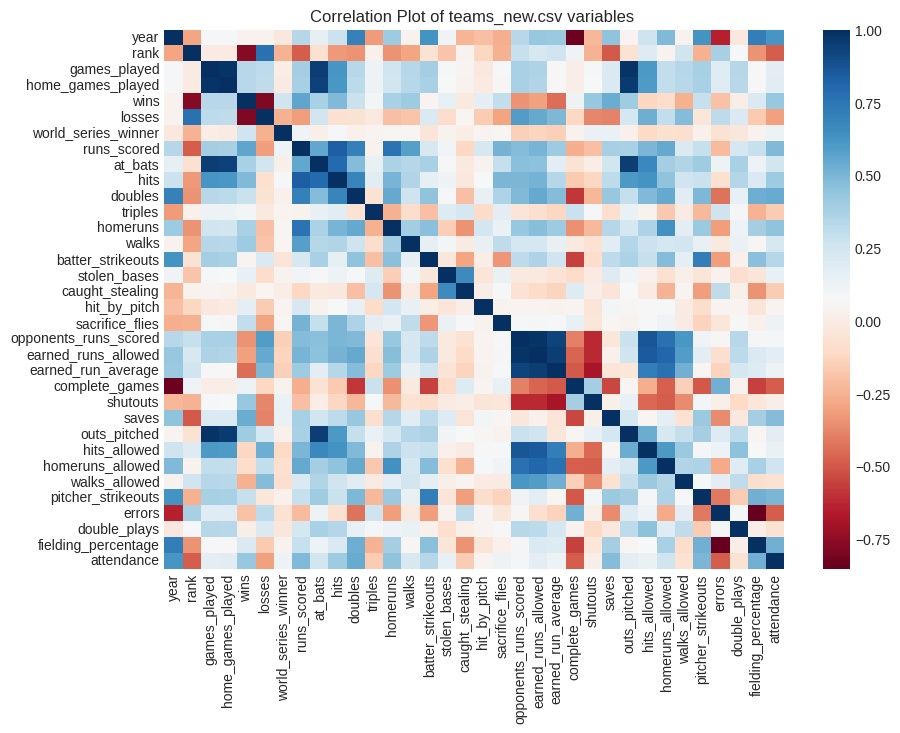

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(teams_recent.corr(method='pearson'), fmt='.3f',
            cmap=plt.get_cmap('RdBu'), cbar=True, ax=ax, xticklabels=True, yticklabels=True)
ax.set(title = "Correlation Plot of teams_new.csv variables ")
#plt.figure();
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal");


First Observations: BPF and PPF do not have any major correlations between any of the other variables. Recommendation is to drop these columns.


Important Variables
*  year
* wins
* losses
* runs scored
* hits
* rank
* opponents' runs scored
* earned run average
* shutouts
* saves
* hits allowed
* homeruns allowed
* walks allowed
* errors
* attendance


and of course the response variable word_series_winner.

We chose these features because they had the highest correlations with our response variable in the correlation matrix, and because of our baseball intuition (knowledge of the game play and mechanics) about which features will most greatly affect the prediction of world series winner.


Categorical Variables (10):
* league - keep
* team - drop team (we can determine team from franchise and year)
* franchise - keep
* division - drop
* division winner -drop
* world series winner - response variable
* name - drop
* park - drop
* league champion- drop

If we include these categorical variables in the model we will need to one-hot-encode and scale them.

The rest of the variables (33) are quantitative.

In [ ]:
(teams.dtypes == object)

year                     False
league                    True
team                      True
franchise                 True
division                  True
rank                     False
games_played             False
home_games_played        False
wins                     False
losses                   False
division_winner           True
wildcard_winner           True
league_champion           True
world_series_winner       True
runs_scored              False
at_bats                  False
hits                     False
doubles                  False
triples                  False
homeruns                 False
walks                    False
batter_strikeouts        False
stolen_bases             False
caught_stealing          False
hit_by_pitch             False
sacrifice_flies          False
opponents_runs_scored    False
earned_runs_allowed      False
earned_run_average       False
complete_games           False
shutouts                 False
saves                    False
outs_pit

In [ ]:
teams_recent

,year,league,team,franchise,division,rank,games_played,home_games_played,wins,losses,...,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,name,park,attendance
1359,1961,AL,BAL,BAL,NaN,3,163,82.0,95,67,...,1226,109,617,926,126,173.0,0.980,Baltimore Orioles,Memorial Stadium,951089.0
1360,1961,AL,BOS,BOS,NaN,6,163,82.0,76,86,...,1472,167,679,831,143,140.0,0.970,Boston Red Sox,Fenway Park II,850589.0
1361,1961,AL,CHA,CHW,NaN,4,163,81.0,86,76,...,1491,158,498,814,128,138.0,0.980,Chicago White Sox,Comiskey Park,1146019.0
1362,1961,NL,CHN,CHC,NaN,7,156,78.0,64,90,...,1492,165,465,755,183,175.0,0.970,Chicago Cubs,Wrigley Field,673057.0
1363,1961,NL,CIN,CIN,NaN,1,154,77.0,93,61,...,1300,147,500,829,134,124.0,0.970,Cincinnati Reds,Crosley Field,1117603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,1344,155,431,1165,78,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,1371,171,516,1393,92,138.0,0.985,San Diego Padres,Petco Park,2459742.0


In [ ]:
teams_recent.isna().sum()

year                       0
league                     0
team                       0
franchise                  0
division                 158
rank                       0
games_played               0
home_games_played          0
wins                       0
losses                     0
division_winner          158
wildcard_winner          794
league_champion            0
world_series_winner        0
runs_scored                0
at_bats                    0
hits                       0
doubles                    0
triples                    0
homeruns                   0
walks                      0
batter_strikeouts          0
stolen_bases               0
caught_stealing            0
hit_by_pitch             938
sacrifice_flies          938
opponents_runs_scored      0
earned_runs_allowed        0
earned_run_average         0
complete_games             0
shutouts                   0
saves                      0
outs_pitched               0
hits_allowed               0
homeruns_allow

In [ ]:
teams_recent = teams_recent.drop(columns=['division', 'division_winner', 'wildcard_winner', 'hit_by_pitch', 'sacrifice_flies', 'name', 'park', 'team', 'league_champion'])
teams_recent

,year,league,franchise,rank,games_played,home_games_played,wins,losses,world_series_winner,runs_scored,...,saves,outs_pitched,hits_allowed,homeruns_allowed,walks_allowed,pitcher_strikeouts,errors,double_plays,fielding_percentage,attendance
1359,1961,AL,BAL,3,163,82.0,95,67,0,691,...,33,4413,1226,109,617,926,126,173.0,0.980,951089.0
1360,1961,AL,BOS,6,163,82.0,76,86,0,729,...,30,4326,1472,167,679,831,143,140.0,0.970,850589.0
1361,1961,AL,CHW,4,163,81.0,86,76,0,765,...,33,4344,1491,158,498,814,128,138.0,0.980,1146019.0
1362,1961,NL,CHC,7,156,78.0,64,90,0,689,...,25,4155,1492,165,465,755,183,175.0,0.970,673057.0
1363,1961,NL,CIN,1,154,77.0,93,61,0,710,...,40,4110,1300,147,500,829,134,124.0,0.970,1117603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAD,1,162,81.0,92,70,0,667,...,47,4337,1317,145,395,1396,75,133.0,0.988,3764815.0
2801,2015,NL,SFG,2,162,81.0,84,78,0,696,...,41,4333,1344,155,431,1165,78,145.0,0.987,3375882.0
2802,2015,NL,ARI,3,162,81.0,79,83,0,720,...,44,4400,1450,182,500,1215,86,146.0,0.986,2080145.0
2803,2015,NL,SDP,4,162,81.0,74,88,0,650,...,41,4321,1371,171,516,1393,92,138.0,0.985,2459742.0


In [ ]:
teams_recent.isna().sum()

year                     0
league                   0
franchise                0
rank                     0
games_played             0
home_games_played        0
wins                     0
losses                   0
world_series_winner      0
runs_scored              0
at_bats                  0
hits                     0
doubles                  0
triples                  0
homeruns                 0
walks                    0
batter_strikeouts        0
stolen_bases             0
caught_stealing          0
opponents_runs_scored    0
earned_runs_allowed      0
earned_run_average       0
complete_games           0
shutouts                 0
saves                    0
outs_pitched             0
hits_allowed             0
homeruns_allowed         0
walks_allowed            0
pitcher_strikeouts       0
errors                   0
double_plays             0
fielding_percentage      0
attendance               0
dtype: int64

In [ ]:
teams_after1961 = teams_recent[['year', 'league', 'franchise', 'rank',  'wins', 'losses', 'runs_scored', 'hits' , 'opponents_runs_scored', 'earned_run_average', 'shutouts', 'saves', 'hits_allowed', 'homeruns_allowed', 'walks_allowed', 'errors', 'attendance', 'world_series_winner']]
teams_after1961

,year,league,franchise,rank,wins,losses,runs_scored,hits,opponents_runs_scored,earned_run_average,shutouts,saves,hits_allowed,homeruns_allowed,walks_allowed,errors,attendance,world_series_winner
1359,1961,AL,BAL,3,95,67,691,1393,588,3.22,21,33,1226,109,617,126,951089.0,0
1360,1961,AL,BOS,6,76,86,729,1401,792,4.29,6,30,1472,167,679,143,850589.0,0
1361,1961,AL,CHW,4,86,76,765,1475,726,4.06,3,33,1491,158,498,128,1146019.0,0
1362,1961,NL,CHC,7,64,90,689,1364,800,4.48,6,25,1492,165,465,183,673057.0,0
1363,1961,NL,CIN,1,93,61,710,1414,653,3.78,12,40,1300,147,500,134,1117603.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAD,1,92,70,667,1346,595,3.44,21,47,1317,145,395,75,3764815.0,0
2801,2015,NL,SFG,2,84,78,696,1486,627,3.72,18,41,1344,155,431,78,3375882.0,0
2802,2015,NL,ARI,3,79,83,720,1494,713,4.04,12,44,1450,182,500,86,2080145.0,0
2803,2015,NL,SDP,4,74,88,650,1324,731,4.09,6,41,1371,171,516,92,2459742.0,0


In [ ]:
teams_after1961[teams_after1961.year == 1981]['world_series_winner']
teams_wo1981 = teams_after1961[teams_after1961.year != 1981]

In [ ]:
teams_1961_2015_new = teams_wo1981

In [ ]:
newpath = "/content/drive/Shareddrives/baseball_folder/baseball"
teams_after1961.to_csv("teams_test1961", index = False, encoding='utf-8')

In [ ]:
teams_1961_2015_new.to_csv('C://Users//kulra//Contacts//Desktop', index=False)

In [ ]:
teams_1961_2015_new.to_csv('teams_1961_2015_new.csv', index=False)


In [ ]:
df_saved_file = pd.read_csv('teams_1961_2015_new.csv')
df_saved_file

,year,league,franchise,rank,wins,losses,runs_scored,hits,opponents_runs_scored,earned_run_average,shutouts,saves,hits_allowed,homeruns_allowed,walks_allowed,errors,attendance,world_series_winner
0,1961,AL,BAL,3,95,67,691,1393,588,3.22,21,33,1226,109,617,126,951089.0,0
1,1961,AL,BOS,6,76,86,729,1401,792,4.29,6,30,1472,167,679,143,850589.0,0
2,1961,AL,CHW,4,86,76,765,1475,726,4.06,3,33,1491,158,498,128,1146019.0,0
3,1961,NL,CHC,7,64,90,689,1364,800,4.48,6,25,1492,165,465,183,673057.0,0
4,1961,NL,CIN,1,93,61,710,1414,653,3.78,12,40,1300,147,500,134,1117603.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2015,NL,LAD,1,92,70,667,1346,595,3.44,21,47,1317,145,395,75,3764815.0,0
1388,2015,NL,SFG,2,84,78,696,1486,627,3.72,18,41,1344,155,431,78,3375882.0,0
1389,2015,NL,ARI,3,79,83,720,1494,713,4.04,12,44,1450,182,500,86,2080145.0,0
1390,2015,NL,SDP,4,74,88,650,1324,731,4.09,6,41,1371,171,516,92,2459742.0,0
